In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

회귀분석
독립변수가 종속변수에 미치는 영향력의 크기를 측정하여 종속변수 값을 예측
선형회귀모델: 설명변수와 종속변수가 직선적 관계
잔차란 회귀모델의 예측치와 실제치 간의 차이를 나타내는데, 
잔차의 합은 ‘0’이며 잔차들의 Xi에 대한 가중합은 ‘0’이다

In [2]:
from sklearn.datasets import fetch_openml
housing = fetch_openml(name='boston')
print(housing)

{'data':         CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:417: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(


 [01]  CRIM	자치시(town) 별 1인당 범죄율

 [02]  ZN	25,000 평방피트를 초과하는 거주지역의 비율

 [03]  INDUS	비소매상업지역이 점유하고 있는 토지의 
 비율

 [04]  CHAS	찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)

 [05]  NOX	10ppm 당 농축 일산화질소

 [06]  RM	주택 1가구당 평균 방의 개수

 [07]  AGE	1940년 이전에 건축된 소유주택의 비율

 [08]  DIS	5개의 보스턴 직업센터까지의 접근성 지수

 [09]  RAD	방사형 도로까지의 접근성 지수

 [10]  TAX	10,000 달러 당 재산세율

 [11]  PTRATIO	자치시(town)별 학생/교사 비율

 [12]  B	1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함.

 [13]  LSTAT	모집단의 하위계층의 비율(%)
 
 [14]  MEDV	본인 소유의 주택가격(중앙값) (단위: $1,000)

In [3]:
# housing 데이터의 data키를 이용하여 피처('설명변수')
# 데이터를 가져와 데이터 프레임으로 변화한다.
# 피처 이름이 들어있는 배열을 데이터프레임의 열 이름으로 지정한다.
# 그리고 housing 데이터의 'target'키를 이용하여 
# 목표변수 (MEDV)데이터를 데이터 프레임으로 변환하고
# 열 이름을 'Target'으로 설정한다.

In [4]:
# 판다스 데이터프레임으로 변환
data = pd.DataFrame(housing['data'], columns=housing['feature_names'])
target = pd.DataFrame(housing['target'], columns=['MEDV'])
# Target = MEDV
# 데이터셋 크기
print(data.shape)
print(target.shape)

(506, 13)
(506, 1)


In [5]:
# 13개의 설명 변수가 담긴 data 데이터프레임과 
# 목표 변수 데이터를 갖는 target 데이터프레임을 결합한다.
# concat 함수에 axis = 1 옵션을 사용하여 좌우 방향으로 연결하듯 붙인다.

In [6]:
# 데이터 프레임 결합
df = pd.concat([data, target], axis=1)
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7


In [7]:
# info 함수를 사용하여 데이터프레임의 기본 정보를 확인한다.
# 모든 열이 506개의 유효(non-null: 결측값이 아닌) 데이터를 가지고 있고
# 자료형은 64비트 실수형임을 알 수 있다. 
# 모든 데이터 값이 숫자로만 구성되었으므로 머신러닝 알고리즘에 바로 입력하여 계산가능

데이터 탐색

In [8]:
# 데이터프레임의 기본정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [9]:
# 데이터프레임 각 열의 결측값 개수를 확인한다.
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [10]:
# 판다스 데이터프레임의 corr 메소드를 적용하면 숫자 데이터를 갖는 변수 간의
# 상관 계수를 계산한다.
# 시본의 heatmap 함수를 사용하면 상관 계수 테이블을 시각화 할 수 있다.
# 이미지 크기를 (10,10)으로 지정하고, 폰트스케일을 0.8로 설정한다. 
# 목표변수인 MEDV 열은 RM 변수와 상관관계수가 0.69고
# LSTAT 변수와 -0.73으로 높은편이다.

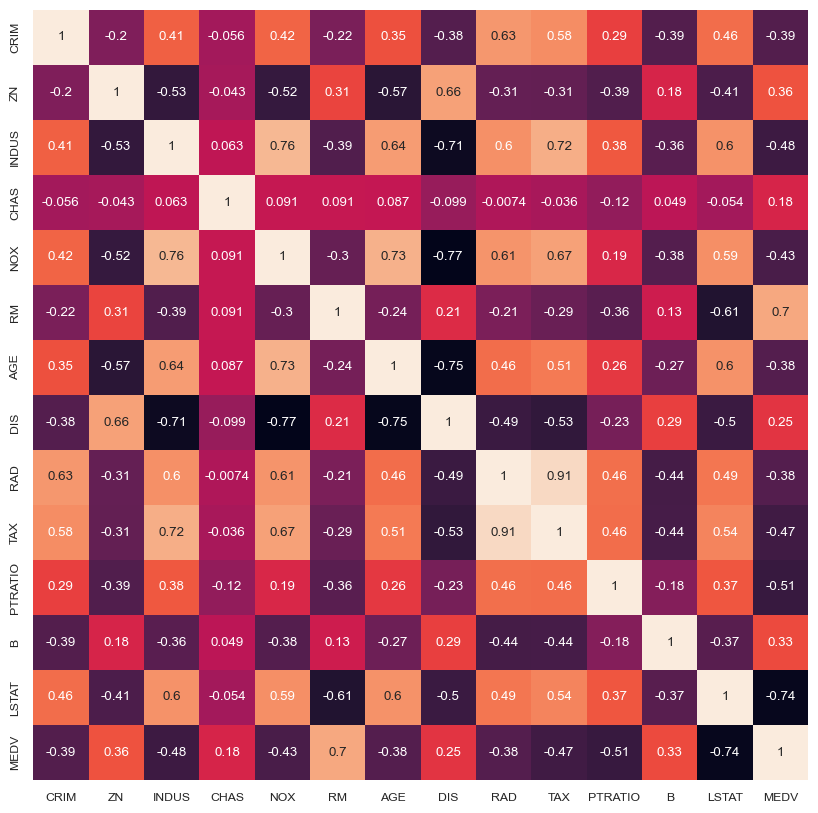

In [11]:
df_corr = df.corr()

#히트맵 그리기
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False);
plt.show()
# +값이 높을 수록 양의 상관관계
# -값이 높을 수록 음의 상관관계
# r=1 기울기에 가까울수록 더 많은 관계성을 가진다(음이던 양이던)

In [12]:
# 목표 변수인 MEDV열과 상관 계수가 높은 순서대로 열 이름과 상관 계수를 출력한다.
# 행 기준으로는 MEDV을 제외한 나머지 변수를 모두 선택하고
# 열 기준으로 MEDV를 선택한다. abs 메소드로 상관 계수의 값을 모두 양의 값으로 바꾼다.
# sort_value 메소드에 ascending=Flase 옵션을 설정하면
# 상관 계수 값을 기준으로 내림차순 정렬하게 된다.
# 상관계수는 두 변수 x,y 사이의 상관관계의 정도를 나타내는 수치
# 보통 직선의 형태고 얼마나 직선에 가까운가를 나타내는 쓰이는 측도다.

In [13]:
corr_order = df.corr().loc[:'LSTAT', 'MEDV'].abs().sort_values(ascending=False)
corr_order

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64

In [14]:
# 데이터분포를 파악하는 좋은 방법은 그래프를 그려보는 것
# MEDV 변수와 함께 상관 계수가 높은 순서대로 4개 피처(LSTAT, RM, PTRATIO,INDUS)
# 를 추출하고, 추출된 데이터프레임을 plor_df 변수에 저장한다. 

In [15]:
plot_cols = ['MEDV','LSTAT','RM','PTRATIO','INDUS']
plot_df = df.loc[:, plot_cols]
plot_df

,MEDV,LSTAT,RM,PTRATIO,INDUS
0,24.0,4.98,6.575,15.3,2.31
1,21.6,9.14,6.421,17.8,7.07
2,34.7,4.03,7.185,17.8,7.07
3,33.4,2.94,6.998,18.7,2.18
4,36.2,5.33,7.147,18.7,2.18
...,...,...,...,...,...
501,22.4,9.67,6.593,21.0,11.93
502,20.6,9.08,6.120,21.0,11.93
503,23.9,5.64,6.976,21.0,11.93
504,22.0,6.48,6.794,21.0,11.93


In [16]:
# 데이터 프레임의 특정 부분을 추출할때 loc 인덱서를 사용하는데
# loc[행 인덱스, 열 이름]과 같이 입력한다.
# 행 인덱스 옵션에 전채 행(:)을 지정하고 열이름 옵션에 plot_cols 리스트를 지정한다
# 행과 열의 위치에 필터 기준을 입련한다고 이해하면 쉽다.
# 따라서 열의 데이터를 기준으로 모든 행을 선택한다. 

In [17]:
# 시본 regplot 함수로 선형 회귀선을 산점도에 표시 할 수 있다. 
# x변수에는 MEDV을 제외한 4개 피처를 입력하고, 
# y변수에는 MEDV열을 지정한다.
# subplot 함수로 2x2 격자 프레임을 만들고
# 4개 피처에 대해아 하니씩 순서대로 regplot을 그린다.

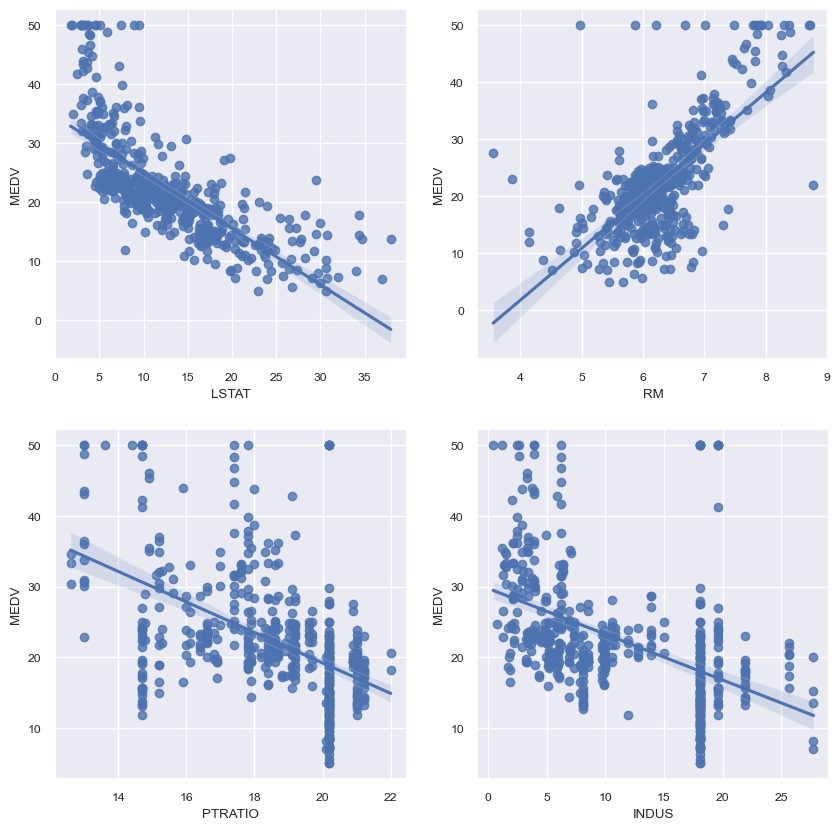

In [18]:
# regplot으로 선형회귀선 표시
plt.figure(figsize=(10,10))
for idx, col in enumerate(plot_cols[1:]):
    axl = plt.subplot(2, 2, idx+1)
    sns.regplot(x=col, y=plot_cols[0], data=plot_df, ax=axl)
plt.show()

In [19]:
# MEDV 열의 주택 가격 데이터 분포를 displot 함수로 그린다.
# kind 속성을 'hist'로 지정하면 KDE밀도 함수 그래프를 그린다. 
# 주택가격을 나타내는 MEDV열은 20을 중심으로 봉우리가 있는 좌우대칭의 정규분포 형태를 보인다.
# 특이한 점은 최대값에 해당하는 50에 많은 데이터가 분포되어있다.

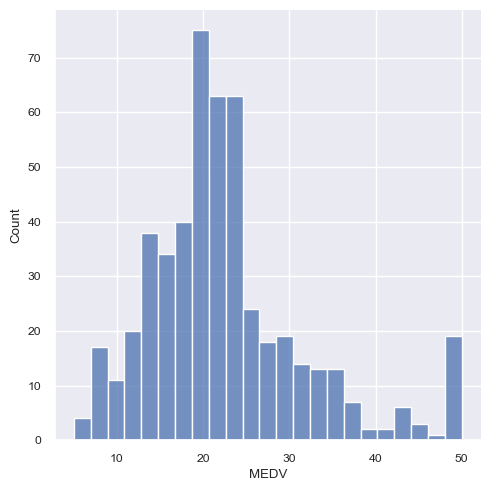

In [20]:
# MEDV 데이터 분포
sns.displot(x='MEDV', kind='hist', data=df)
plt.show()

데이터 전처리

In [21]:
# 각 피처 데이터 크기에 따른 상대적 영향력의 차이를 제거하기 위해피처의 크기를 비슷한 수준으로 맞춰주는 작업이 필요하다
# 이 과정을 피처 스케일링이라고 부른다
# 사이킷런 MinMaxScaler를 활용한 정규화(Normalization) 방법을 구현한다.
# 목표 변수인 MEDV 열을 제외한 나머지 13개 열의 데이터를 iloc인덱서로 추출한다.
# 마지막 열을 나타내는 -1을 포함하지 않는다. 
# 이 데이터를 MinMaxScaler 인스턴스 객체에 fit 메소드로
# 각 열의 데이터를 최솟값 0, 최대값 1사이로 변환하는 식을 학습한다.


In [22]:
# transform 함수를 사용하면 학습한 변환식을 실제로 적용하여 데이터를 정규화 변환한다.
# 사이킷런 MinMaxScaler 적용
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_scaled = df.iloc[:,:-1]
scaler.fit(df_scaled)
df_scaled = scaler.transform(df_scaled)

#스케일링 변환 된 값을 데이터프레임에 반영
df.iloc[:,:-1] = df_scaled[:,:]
df.head()
# loc 인덱서는 인덱스 이름을 사용하지만, iloc 인덱서는 원소의 순서를 나타내는 정수 인덱스(0,1,2,....)를 사용한다
# 즉, iloc 인덱서는 행과 열의 위치 순서만 고려한다. 
# loc인덱서는 범위의 끝을 포함하지만, iloc 인덱서는 포함하지 않는다
# 따라서 df.iloc[:.:-1]은 가장 마지막열인 MEDV을 제외한 나머지 13개의 열을 추출한다.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,24.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,21.6
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,34.7
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,33.4
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,36.2


In [23]:
# 학습데이터와 테스트 데이터 분할
# EDA를 통해 LSTAT(저소득층 비율)와 RM(방의 개수)는 목표 변수인 MEDV(주택가격)과 강한 선형관계를 나타내는 사실을 알고 있다.
# 따라서 목표 변수와 상관 계수가 가장 큰 LSTAT, RM을 학습데이터로 선택한다.
# 그리고 506개의 주택 샘풀 중 20%를 모델 평가에 사용한다.
# train_test_split 함수의 test_size 옵션에 0.2를 입력하면 404개의 학습데이터(X_train, y_train)과
# 102개의 테스트 데이터(X_test, y_test)로 분할된다.

In [24]:
# 테스트 데이터넷 분할
from sklearn.model_selection import train_test_split
X_data = df.loc[:,['LSTAT', 'RM']]
y_data = df.loc[:, 'MEDV']
x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, shuffle=True, random_state=12)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
# 일반적으로 검증데이터를 10~30%수준으로 설정한다.
# 교차 검증을 하더라도 검증 데이터의 비중이 낮으면 훈련 데이터에 과대적합하는 것을 막기 어렵다.
# 반대로 검증 데이터가 너무 많으면 모델 학습에 필요한 데이터가 부족해서 학습이 안될 수 가 있다.

(404, 2) (404,)
(102, 2) (102,)


선형(다중) 회귀

In [25]:
# LinearRegression 클래스 객체를 생성하고 fit 메소드에 학습데이터
# X_train y_train을 입력하면 선형 회귀식을 갖는다.
# 선형 회귀 모델의 coef_ 속성으로 부터 각 피처에 대한 회귀계수 값을 얻고 interecpt_
# 속성에서 상수항(절편) 값을 얻는다. LATAT에 대한 회귀계수는 -23.2이고
# RM에 대한 회귀계수는 25.4이다.
# 현재 회귀 계수의 추정치는 25.4으로 나와있는데 해석하는 방법은 매우 간단합니다. 
# X가 1단위 증가할 때 Y는 25.4단위 증가한다
# LSTAT(저소득층 비율)가 클수록 MEDV(주택가격) 값은 작아진다. 
# 반면 RM(방의 개수)이 클수록 MEDV(주택가격) 값은 커진다.

In [26]:
# 선형 회귀 모델
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
print("회귀계수(기울기):", np.round(lr.coef_, 1))
print("상수항(절편):", np.round(lr.intercept_, 1))
# 상수항(절편) = x(변수가) 0일때 결과 값

회귀계수(기울기): [-23.2  25.4]
상수항(절편): 16.3


In [27]:
# predict 함수에 테스트 데이터(X_test)를 입력하면 목표 변수(MEDV)에 대한 예측값을 얻는다.
# 예측값을 y_test_pred에 저장하고, 실제 값인 y_test와 함께 산점도로 그려 비교한다.
# 맷플롯립의 scatter 함수를 이용한다.
# X축과 Y축의 값을 순서대로 입력한다. 범례에 표시할 값을 label옵션에 지정하는데(생략가능)
# c옵션은 색상을, r은 red를 뜻한다. 
# 빨간 점으로 표시된 부분이 모델이 예측한 값(y_pred)의 분포를 나타낸다.
# legend 함수는 범례를 표시하는 명령이고, 
# loc옵션으로 범례가 표시되는 위치를 지정한다.

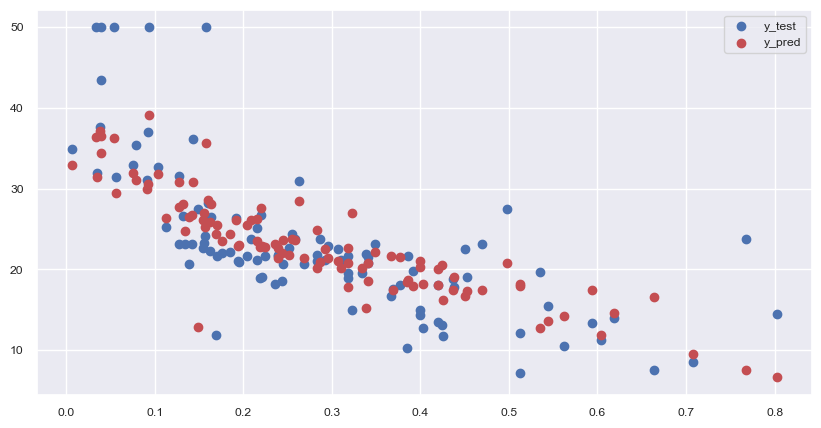

In [28]:
# 예측
y_test_pred = lr.predict(x_test)

# 예측값 실제값의 분포
plt.figure(figsize=(10,5)) # 그림또는 도표로 나타내기
plt.scatter(x_test['LSTAT'], y_test, label='y_test')
plt.scatter(x_test['LSTAT'], y_test_pred, c='r', label='y_pred')
plt.legend(loc='best')
plt.show()

모델 성능 평가

In [29]:
# 예측값이 실제 데이터를 정확하게 설명한다고 보기는 어렵다.
# 실제 정답과 예측값의 오차가 상당한 편이고, 이 차이를 잔차라 부른다.

In [30]:
# 모델 성능을 평가할 때 수치화된 성능지표를 사용한다.
# 회귀 모델의 성능을 평가하는 지표로는 MAE, MSE, RMSE 등이 있다.
# 사이킷런의 metrics 모듈에 다양한 성능평가 지표가 정의되어 있다.
# 오차를 나타내는 지표이므로 값이 작을 수록 모델의 성능이 좋다고 할 수 있다.

In [31]:
# 테스트 오차(Test MSE)는 mean_squared_eroor 함수로 계산한다. 
# 평가 지표 함수에 테스트 데이터의 실제 y값(y_test)과 예측한 y값(y_test_pred)를 입력한다.
# 비교를 위해 훈련 데이터의 평가 점수인 Train MSE도 계산한다. 

In [32]:
# 평가
from sklearn.metrics import mean_squared_error
y_train_pred = lr.predict(x_train)

train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%3f" % train_mse)

test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %3f" % test_mse)

Train MSE:30.804234
Test MSE: 29.506547


In [33]:
# 사이킷런 cross_val_score함수를 이용하여 K-Fold 교차검증을 간단하게 수행할 수 있다.
# cv 옵션에 폴드를 5개로 설정하고 평가 지표를 MSE로 지정한다.
# corss_val_score 함수는 MSE를 음수로 계산하기 때문에 
# -1을 곱해서 양수로 변환해준다.
# (scoring 옵션에 지정한'neg_mean_squered_error'의 neg는 negative를 뜻한다.)
# 실행 결과에 5개의 폴드의 값이 큰 편차 없이 비교적 고른편이다.
# 모델의 일반화 성능이 양호하다고 볼 수 있다.

In [34]:
# cross_val-score 함수
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
mse_score = -1*cross_val_score(lr, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("개별 Fold의 MSE:", np.round(mse_score, 4))
print("평균 MSE:%4f" % np.mean(mse_score))

개별 Fold의 MSE: [31.465  34.668  28.9147 29.3535 34.6627]
평균 MSE:31.812802


과대 적합 회피

In [35]:
# 과대적합은 모델이 학습에 사용한 데이터와 비슷한 데이터는 잘 예측하나
# 경험해 보지 못한 새로운 데이터에 예측력이 떨어지는 현상을 말한다.
# 모델이 훈련 데이터에 지나치게 적응해버리면
# 훈련 데이터와 차이가 큰 새로운 데이터에 대해서는 
# 모델이 학습한 패턴으로는 잘 설명되지 않는 변수가 발생한다.

In [36]:
# 반대로 과소적합은 훈련데이터의 특성을 파악하기 충분하지 않을 정도로 모델의
# 구성이 단순하거나 데이터의 개수가 부족할 때 발생한다.
# 과대적합의 경우 모델이 예측한 패턴이 이상치까지 설명하기 위해
# 복잡한 형태를 갖지만
# 과소 적합의 경우 단순한 선형 함수로 데이터 분포를 충분히 설명하지 못한다.

In [37]:
# PolynomiaFeatures 함수의 degree 옵션을 2차로 지정하고 데이터를 입력하면
# 데이터셋을 2차 수식으로 변환한다.
# 단항식 보다 다항식으로 선형회귀식을 만드는 것이 
# 모델의 예측력을 높일 수 있는 방안이다.
# PolynomialFeatures함수를 통해 현재 데이터를 다항식 형태로 변경한다. 
# (각 특성의 제곱 혹은 그 이상을 추가)

우리가 구하고자 하는 것은 주어진 데이터를 가장 잘 표현하는 다항식
오차의 제곱의 합이 최소화되어야한다.
따라서 Sr이 최소가 되어야 하므로 Sr을 미분하면 0이 되어야 한다.
각 미지수 a0, a1, a2로 미분한 것이 0이 되어야한다.

In [38]:
# 2차 다항식 변환
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
x_train_poly = pf.fit_transform(x_train)
print("원본 학습 데이터 셋:", x_train.shape) # 2개인 이유 LATST, RM 이 두가지 값을 가지기 때문이고
print("2차 다항식 변환 데이터 셋:", x_train_poly.shape) # 각 피처에 대한 2차항이 추가 되어 피처개수가 늘어난다.
# print(x_train_poly)
# print(x_train)
# 데이터 셋이 6개인 경우 각각의 미지수의 값을 a0, a1, a2로 나눠놨고
# 그것을 미분하여 0이되는 것을 찾기 위하여 제곱, 및 다양한 형태로 새롭게
# 일정하게 수를 규졍했기 때문
# print(x_train_poly)

원본 학습 데이터 셋: (404, 2)
2차 다항식 변환 데이터 셋: (404, 6)


In [39]:
# 2차식으로 변환된 데이터셋을 선형 회귀 모델에 입력하여 학습한다.
# 모델의 성능을 평가하면 Train MSE는 21.54, Test MSE는 16.79이다
# 1차항 선형 회귀 모델보다 성능이 좋은편이다.

transform = 변환(사용할 데이터를 변환시킨다)
ex) pf.fit_transfrom(x_test) == x_test를 poly형식에 맞게 변환시킨다는 의미
! trasnform()과 fit_transfrom의 차이점은?
fit = 훈련해라(모델링해라)
transfrom() = fit을기준으로 얻은 mean, variance에 맞춰서 변형해라
! 그러면 왜 train dataset에서만 fit transfrom을 진행하는가?
-> test set에도 fit을 해버리면 sclaer가 기존에 학습 데이터에 fit한 기준을
다 무시하고 테스트 데이터에 새로운 mean, variance값을 얻으면서 
테스트 데이터까지 학습해버린다.


In [40]:
# 2차 다항식 변환 데이터셋으로 선형 회귀 모델 모형 학습
lr = LinearRegression()
lr.fit(x_train_poly, y_train) # y_train은 실제 결과값

# 테스트 데이터에 대한 예측 밒 평가
y_train_pred = lr.predict(x_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%3f" % train_mse)

x_test_poly = pf.fit_transform(x_test) # 학습한 예측결과랑 test값의 예측 결과 파악
y_test_pred = lr.predict(x_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:%3f" % test_mse)

Train MSE:21.546340
Test MSE:16.795381


In [60]:
실제집값 = df['MEDV']
실제집값

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [62]:
print(lr.predict(x_train_poly))

[30.48232422 23.23286885 18.21662105 15.99611748 14.03043492 17.38469659
 22.09722609 22.69199601 27.02231041 20.01837005 23.63776565 24.12703225
 22.96426076 19.80311577 46.1613817  15.72312844 23.2633254  48.82165239
 37.0554125  36.50893638 22.44537294 43.41161678 25.463781   23.02307806
 21.47368303 24.26103387 31.84745571 20.04480038 21.33388693 19.92142997
 19.25269439 19.37465192 19.19555196 20.40720679 15.56257804 20.06427953
 41.53870675 13.00420623 15.48388625 20.9769819  19.38329877 19.81513987
 27.40262697 18.18887695 19.04675724 14.80639395 16.88043653 21.80674455
 30.51373646 18.90537137 21.29536775 17.91916602 21.45323797 19.83101786
 12.96362022 20.02353172 36.89069555 16.07775431 21.10348404 35.38769243
 19.82706044 17.21915303 19.14063475 20.07289186 20.39216216 20.05582778
 14.49408321 25.32092023 14.11052172 45.11373756 21.81070222 26.25849241
 15.97974064 25.26752618 19.96064218 20.41739236 20.00076192 21.00158465
 18.86431542 15.28935592 14.03363231 19.45665229 29

In [41]:
# 이번에는 15차 다항식으로 변환해보자 
# Train MSE는 11.16으로 감소했지만 Test MSE는 급격하게 증가한다.
# 과대적합 상태로 신규 데이터에 대한 예측력을 상실한 것으로 볼 수 있다.

In [42]:
# 15차 다항식 변환 데이터셋으로 선형 회귀 모형 학습
pf = PolynomialFeatures(degree=15)
x_train_poly = pf.fit_transform(x_train)

lr = LinearRegression()
lr.fit(x_train_poly, y_train)

# 테스트 데이터에 대한 예측 및 평가
y_train_pred = lr.predict(x_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.3f" % train_mse)

x_test_poly = pf.fit_transform(x_test)
y_test_pred = lr.predict(x_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:%.4f" % test_mse)

Train MSE: 11.258
Test MSE:83553656068651.0312


In [43]:
# 다항식 차수에 따른 선형 회귀 모델의 LSTAT 피처에 대한 적합도를 산점도로 그린다.
# 1차항일 때는 데이터의 곡선 패턴을 설명하기에는 부족해보인다.
# 2차항일 때는 데이터에 대한 설명력이 좋아진 것으로 보인다.
# 15차항일 때는 회귀곡선의 변곡점이 많아져 불안정해 보인다.

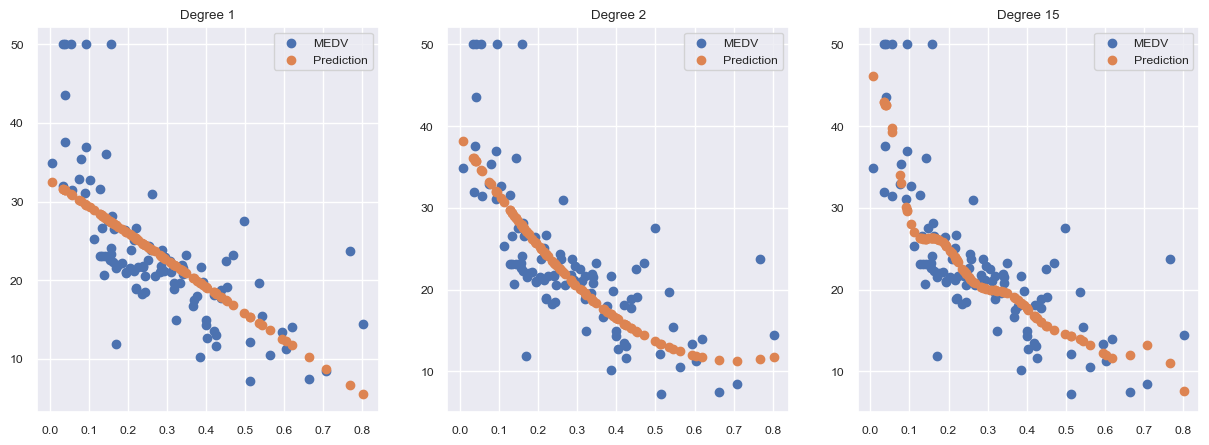

In [44]:
# 다항식 차수에 따른 모델 적합도 변화
plt.figure(figsize=(15,5))
for n, deg in enumerate([1, 2, 15]):
    axl = plt.subplot(1,3, n+1)
    # plt.axis('off')
    # degree별 다항 회귀 모형 적용
    pf = PolynomialFeatures(degree=deg)
    x_train_poly = pf.fit_transform(x_train.loc[:,['LSTAT']]) # 전채 행 선택후 열의 LSTAT선택 즉, RM제외
    x_test_poly = pf.fit_transform(x_test.loc[:, ['LSTAT']])
    lr = LinearRegression()
    lr.fit(x_train_poly, y_train)
    y_test_pred = lr.predict(x_test_poly)
    # 실제값 분포
    plt.scatter(x_test.loc[:,['LSTAT']], y_test, label='MEDV')
    # 예측값 분포
    plt.scatter(x_test.loc[:,['LSTAT']], y_test_pred, label='Prediction')
    # 제목 표시
    plt.title("Degree %d" % deg)
    # 범례 표시
    plt.legend()
plt.show()

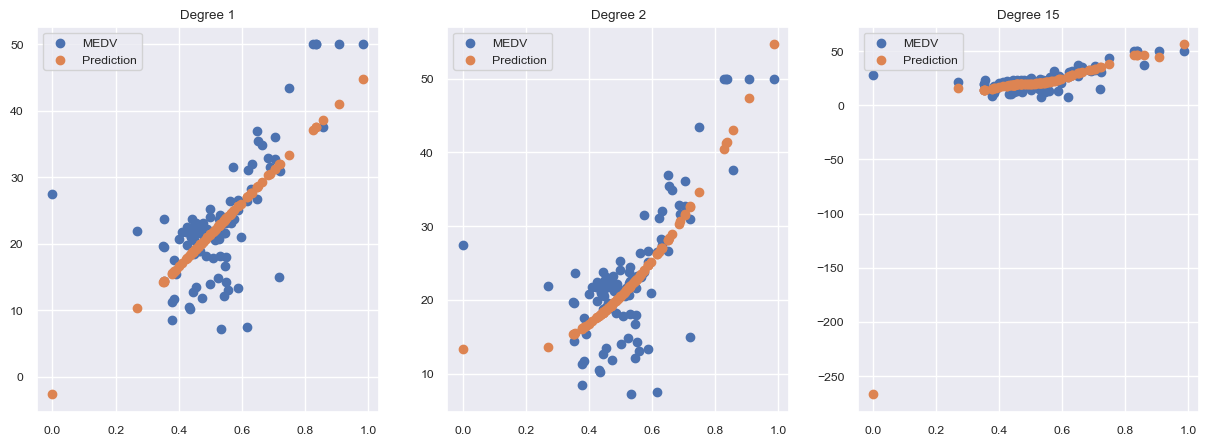

In [45]:
# 다항식 차수에 따른 모델 적합도 변화
plt.figure(figsize=(15,5))
for n, deg in enumerate([1, 2, 15]):
    axl = plt.subplot(1,3, n+1)
    # plt.axis('off')
    # degree별 다항 회귀 모형 적용
    pf = PolynomialFeatures(degree=deg)
    x_train_poly = pf.fit_transform(x_train.loc[:,['RM']]) # 전채 행 선택후 열의 LSTAT선택 즉, RM제외
    x_test_poly = pf.fit_transform(x_test.loc[:, ['RM']])
    lr = LinearRegression()
    lr.fit(x_train_poly, y_train)
    y_test_pred = lr.predict(x_test_poly)
    # 실제값 분포
    plt.scatter(x_test.loc[:,['RM']], y_test, label='MEDV')
    # 예측값 분포
    plt.scatter(x_test.loc[:,['RM']], y_test_pred, label='Prediction')
    # 제목 표시
    plt.title("Degree %d" % deg)
    # 범례 표시
    plt.legend()
plt.show()

In [46]:
# 모델의 복잡도를 낮추면 과대적합을 억제할 수 있다. 
# 모델을 설명하는 각 피처가 모델의 예측 결과에 미치는 영향력을
# 가중치(회귀계수)로 표현하는데, 
# 이런 가중치들이 커지면 패널티를 부과하여 가중치를 낮은 수준으로 유지한다.
# 따라서 예측 편차를 줄이는 효과를 얻는다.
# 이처럼 모델의 구조가 복잡해지는 것을 억제하는 방법을 규제라고 한다.

In [47]:
# 모델의 구조를 간결하게 하는 방법 중 L2/L1 규제가 있다. 
# L2규제는 모델의 '가중치의 제곱합'에 패널티를 부과하고, 
# L1규제는 가중치 절대값의 합에 패널티를 부과하여
# 모델의 복잡도를 낮출 수 있다.

In [48]:
# Ridge 모델은 선형회귀 모형에 L2규제를 구현한 알고리즘이다.
# 알파 값으로 L2규제 강도를 조정한다.
# 알파 값을 증가시키면 규제 강도가 커지고 모델의 가중치를 감소시킨다.
# 15차항으로 변환한 데이터를 사용하여 학습해도 
# 훈련오차와 테스트 오차값의 차이가 크지 않아 과대적합 문제는 해소되었다고 볼 수 있다.

In [49]:
# Ridge(L2 규제)
from sklearn.linear_model import Ridge
rdg = Ridge(alpha=2.5) # 알파값으로 강도를 조정
rdg.fit(x_train_poly, y_train)

y_train_pred = rdg.predict(x_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%.4f" % train_mse)
y_test_pred = rdg.predict(x_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:%.4f" % test_mse)

Train MSE:38.4442
Test MSE:32.1735


In [50]:
# Lasso(L1 규제)
from sklearn.linear_model import Lasso
las = Lasso(alpha=0.05)
las.fit(x_train_poly, y_train)

y_train_pred = las.predict(x_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%.4f" % train_mse)
y_test_pred = las.predict(x_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:%.4f" % test_mse)

Train MSE:39.3750
Test MSE:32.8878


In [51]:
# ElasticNet 알고리즘은 L2규제와 L1규제를 모두 적용한 선형 회귀 모델이다.
# ElasticNet의 알파 값은 L2규제 강도와 L1규제 강도의 합이다. 
# l1-ratio 옵션은 L1 규제 강도의 상대적 비율을 조정한다.
# l1_ratio가 0이면 L2규제와 같고, l1_ratio이 1이면 L1규제와 같다.

In [52]:
# ElasticNet(L2/L1 규제)
from sklearn.linear_model import ElasticNet
ela = ElasticNet(alpha=0.1, l1_ratio=0.7)
ela.fit(x_train_poly, y_train)

y_train_pred = ela.predict(x_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("train MSE:%.4f" % train_mse)
y_test_pred = ela.predict(x_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("test_mse:%.4f" % test_mse)

train MSE:45.7963
test_mse:37.0734


트리 기반 모델 - 비선형 회귀

In [53]:
# DecisionTreeRegressor는 의사 결정 나무 알고리즘 회귀 모형이다.
# 선형 회귀 모델에 비하여 예측 오차가 낮은 편이다.

In [54]:
# 의사결정나무
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=3, random_state=12)
dtr.fit(x_train, y_train)

y_train_pred = dtr.predict(x_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%.4f" % train_mse)

y_test_pred = dtr.predict(x_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:%.4f" % test_mse)


Train MSE:18.8029
Test MSE:17.9065


In [55]:
# 랜덤 포레스트
# 랜덤 포레스트는 하나의 트리를 사용하는 의사결정나무에 비하여 
# 여러 개의 트리 모델이 예측 한 값을 종합하기 떄문에 전체 예측력을 높일 수 있다.
# 약간의 과대적합된 경향이 있다.

In [56]:
# 랜덤 포레스트
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=3, random_state=12)
rfr.fit(x_train, y_train)

y_train_pred = rfr.predict(x_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%.4f" % train_mse)

y_test_pred = rfr.predict(x_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:%.4f" % test_mse)

Train MSE:16.0201
Test MSE:17.7751


In [57]:
# XGBoost
# 부스팅 알고리즘인 XGBRefressor을 적용한다.
# 랜덤포레스트와 비교하면 모델의 예측력은 향상된 것으로 보이지만
# Train MSE와 Test MSE의 차이가 커서 과대적합이 심화되었다.

In [58]:
# XGBoost
from xgboost import XGBRegressor
xgbr = XGBRegressor(objective='reg:squarederror', max_depth=3, random_state=12)
xgbr.fit(x_train, y_train)

y_train_pred = xgbr.predict(x_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%.4f" % train_mse)

y_test_pred = xgbr.predict(x_test)
text_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:%.4f" % test_mse)

Train MSE:3.5176
Test MSE:17.7751


In [59]:
# 데이터의 개수가 작기 때문에 XGBoost와 같이 복잡도가 높은 알고리즘이 
# 쉽게 과대적합될 위헙성이있다.
# XGBoost 알고리즘은 데이터의 개수가 비교적 많고, 모델 예측의 난이도가 높은경우
# 탁월한 성능을 보인다.